# Machine Learning Regression

## Contents:
1. Imports
2. Data Prep
3. Regression Analysis
4. Comparison of Regression
5. Test Set Predictions

### 1. Imports

In [1]:
# Import libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# make path and import df

path = r'C:\Users\walls\Documents\Coding\Data Analysis\CareerFoundry\Data Immersion A6\CA SAT Analysis'
df_schools_mapped = pd.read_csv(os.path.join(path, 'Data','Prepared Data', 'School Rates Mapped.csv'))

In [3]:
df_schools_mapped.head()

,index,school,enroll12,test_takers,Test Rates,Enroll Category,County Name
0,5,Alameda Science and Technology Institute,37,35,0.945946,High enrollment,Alameda County
1,7,Alameda High,381,255,0.669291,High enrollment,Alameda County
2,8,Alameda Community Learning Center,52,46,0.884615,High enrollment,Alameda County
3,9,Alternatives in Action,31,17,0.548387,Average enrollment,Alameda County
4,12,Albany High,285,179,0.628070,High enrollment,Alameda County


In [4]:
df_schools_mapped.shape

(1217, 7)

### 2. Data Prep

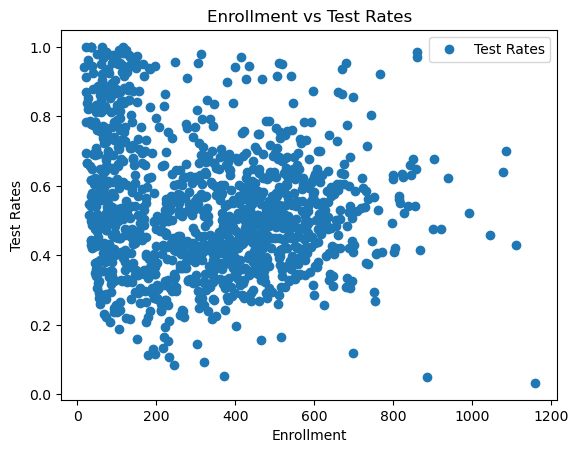

In [5]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_schools_mapped.plot(x = 'enroll12', y='Test Rates',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Enrollment vs Test Rates')  
plt.xlabel('Enrollment')  
plt.ylabel('Test Rates')  
plt.show()

In [6]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_schools_mapped['enroll12'].values.reshape(-1,1)
y = df_schools_mapped['Test Rates'].values.reshape(-1,1)

In [7]:
X

array([[ 37],
       [381],
       [ 52],
       ...,
       [ 38],
       [202],
       [168]], dtype=int64)

In [8]:
y

array([[0.94594595],
       [0.66929134],
       [0.88461538],
       ...,
       [0.55263158],
       [0.27722772],
       [0.35714286]])

In [9]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 3. Regression Analysis

In [10]:
# Create a regression object.

regression = LinearRegression()  # Will be fit onto the training set.

In [11]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [12]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

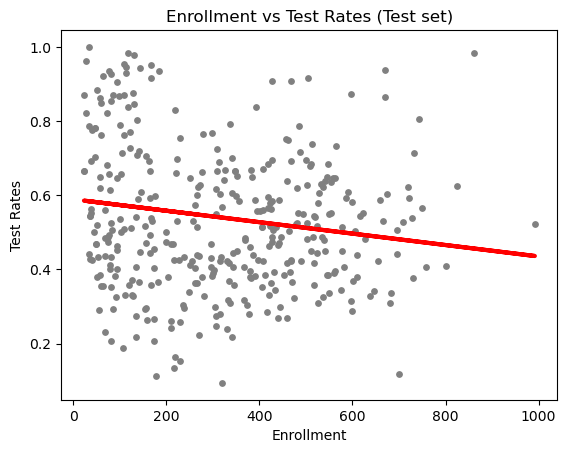

In [13]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Enrollment vs Test Rates (Test set)')
plot_test.xlabel('Enrollment')
plot_test.ylabel('Test Rates')
plot_test.show()

##### Observations:
1. Regression line is at a downward angle indicating a negative coorelation between Enrollment and Test Rates
2. This suggests that as enrollment numbers increase, test rates will decrease

In [14]:
# Create objects that contain the model summary statistics

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [15]:
# Print the model summary statistics to evaluate the performance of the model

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.00015415]]
Mean squared error:  0.035884510934972136
R2 score:  0.006994302941126795


In [16]:
y_predicted

array([[0.58375311],
       [0.52394117],
       [0.53519444],
       [0.56818351],
       [0.52039561],
       [0.57989925],
       [0.58359896],
       [0.57712447],
       [0.50837156],
       [0.50991311],
       [0.54166893],
       [0.51160881],
       [0.52640764],
       [0.51176296],
       [0.57758693],
       [0.50205123],
       [0.54937666],
       [0.49634751],
       [0.52841165],
       [0.57851186],
       [0.57897432],
       [0.58174911],
       [0.56186317],
       [0.56309641],
       [0.57172906],
       [0.5045177 ],
       [0.55446376],
       [0.52656179],
       [0.4994306 ],
       [0.53920246],
       [0.5045177 ],
       [0.55569699],
       [0.54644772],
       [0.56926259],
       [0.49573089],
       [0.5166959 ],
       [0.51022141],
       [0.50251369],
       [0.56818351],
       [0.57434969],
       [0.57388723],
       [0.48185699],
       [0.57157491],
       [0.48555669],
       [0.57712447],
       [0.50698417],
       [0.53719845],
       [0.564

##### Observations:
1. As with the visual, the slop stats give a negative coorelation
2. The mean squared error seems small
3. The R2 score is likely too low and explains only a small sample of data variance

In [17]:
# Create a dataframe comparing the actual and predicted values of y

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0.441176,0.583753
1,0.578199,0.523941
2,0.598854,0.535194
3,0.407407,0.568184
4,0.298876,0.520396
5,0.355932,0.579899
6,0.428571,0.583599
7,0.493506,0.577124
8,0.443595,0.508372
9,0.738791,0.509913


##### Observations:
1. The model so far is performing poorly
2. Original hypothesis (if there are more students enrolled, then less students will take the SAT [test rates will be low]) is incorrect
3. A model with more "dimensionality" is necessary for this dataset

In [18]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0.441176,0.583753
1,0.578199,0.523941
2,0.598854,0.535194
3,0.407407,0.568184
4,0.298876,0.520396
5,0.355932,0.579899
6,0.428571,0.583599
7,0.493506,0.577124
8,0.443595,0.508372
9,0.738791,0.509913


### 4. Comparison of Regression

In [19]:
# Prediction of X-train

y_predicted_train = regression.predict(X_train) # X_train

In [20]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [21]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.00015415]]
Mean squared error:  0.034335821561052686
R2 score:  0.032189477134918265


##### Observations: 
1. Slope is the same
2. Mean sqrd error is a little smaller
3. R2 score is a little higher but still too low

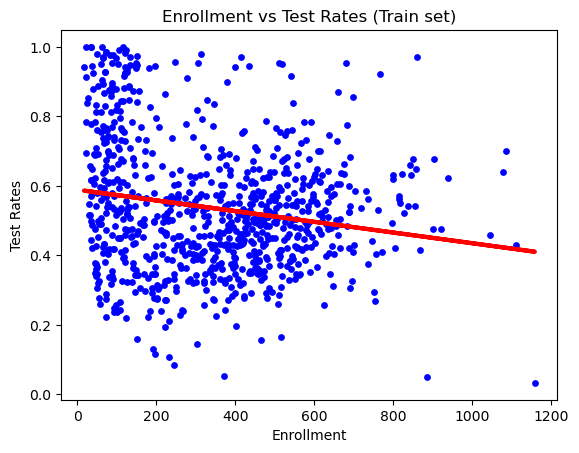

In [22]:
# Visualizing the training set results

plot_test = plt
plot_test.scatter(X_train, y_train, color='blue', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Enrollment vs Test Rates (Train set)')
plot_test.xlabel('Enrollment')
plot_test.ylabel('Test Rates')
plot_test.show()

### 5. Predictions on the Test set

In [23]:
# Reshape again.

X_2 = df_schools_mapped['enroll12'].values.reshape(-1,1)
y_2 = df_schools_mapped['Test Rates'].values.reshape(-1,1)

In [24]:
X_2

array([[ 37],
       [381],
       [ 52],
       ...,
       [ 38],
       [202],
       [168]], dtype=int64)

In [25]:
y_2

array([[0.94594595],
       [0.66929134],
       [0.88461538],
       ...,
       [0.55263158],
       [0.27722772],
       [0.35714286]])

In [26]:
# Split data into a training set and a test set

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [27]:
# Run and fit the regression

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [28]:
# Predict

y_predicted_2 = regression.predict(X_test_2)

In [29]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [30]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.00015415]]
Mean squared error:  0.035884510934972136
R2 score:  0.006994302941126795


##### Observations: 
Same values as before

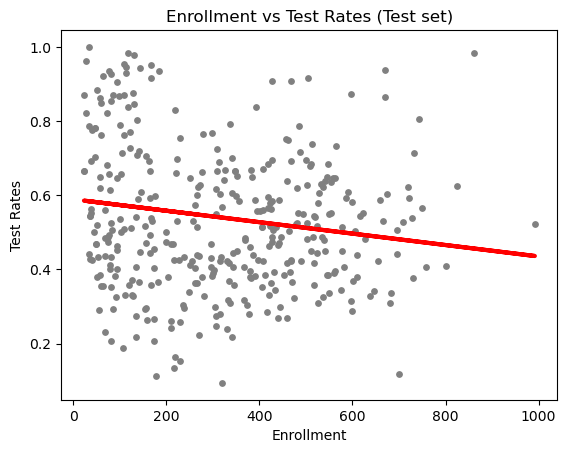

In [31]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Enrollment vs Test Rates (Test set)')
plot_test.xlabel('Enrollment')
plot_test.ylabel('Test Rates')
plot_test.show()

##### Observations: 
The test set has less density of concentrated data points

In [32]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,0.441176,0.583753
1,0.578199,0.523941
2,0.598854,0.535194
3,0.407407,0.568184
4,0.298876,0.520396
5,0.355932,0.579899
6,0.428571,0.583599
7,0.493506,0.577124
8,0.443595,0.508372
9,0.738791,0.509913


##### Observations: 
The same as the training set

### 6. Insights

The model performed just the same on the test set as it did the training set. 

    For both, the visuals show a negative correlation between the two variables by the downward regression line. 
    For the MSE and R2 score, they were identical in value. The MSE score was small, which is good, however, the R2 score is too low on both to properly make predictions.

Because of the poor model performance, the initial hypothesis can be determined to be false.

    Enrollment could still be an important variable, so further analysis may reveal other relationships. 
    It may be that the model is too simple for the dataset and something more robust is necessary for anlaysis. 

Any biases? 

    The SAT is a highly debatable test as it is, so one could say there is implicit racial and cultural biases. This is true especially if certain schools or counties have a higher population of certain demographics.
    Some score averages were not given, therefore not all schools or counties are represented in this data, which could create a skew in the perception of school and county level SAT results and test rates. 